# Exercise Decision Tree Classifier 

0. Import usual libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import  OneHotEncoder, StandardScaler, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, roc_curve
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) # to avoid deprecation warnings

import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
# setting Jedha color palette as default
pio.templates["jedha"] = go.layout.Template(
    layout_colorway=["#4B9AC7", "#4BE8E0", "#9DD4F3", "#97FBF6", "#2A7FAF", "#23B1AB", "#0E3449", "#015955"]
)
pio.templates.default = "jedha"
pio.renderers.default = "svg" # to be replaced by "iframe" if working on JULIE

1. Import the bl.txt dataset and display the first few lines.

In [2]:
# Import dataset
print("Loading dataset...")
dataset = pd.read_csv("bl.txt")
print("...Done.")
print()

Loading dataset...
...Done.



In [3]:
dataset.head()

,balance,left_weight,left_distance,right_weight,right_distance
0,B,1,1,1,1
1,R,1,1,1,2
2,R,1,1,1,3
3,R,1,1,1,4
4,R,1,1,1,5


2. Display a descriptive statistic table

In [4]:
dataset.describe(include='all')

,balance,left_weight,left_distance,right_weight,right_distance
count,625,625.000000,625.000000,625.000000,625.000000
unique,3,NaN,NaN,NaN,NaN
top,R,NaN,NaN,NaN,NaN
freq,288,NaN,NaN,NaN,NaN
mean,NaN,3.000000,3.000000,3.000000,3.000000
std,NaN,1.415346,1.415346,1.415346,1.415346
min,NaN,1.000000,1.000000,1.000000,1.000000
25%,NaN,2.000000,2.000000,2.000000,2.000000
50%,NaN,3.000000,3.000000,3.000000,3.000000
75%,NaN,4.000000,4.000000,4.000000,4.000000


In [5]:
dataset['balance'].value_counts()

R    288
L    288
B     49
Name: balance, dtype: int64

3. What is the dataset shape?

In [6]:
dataset.shape

(625, 5)

4. Separate the target variable "balance" into a Y object and the explanatory variables into a X object.

In [7]:
X = dataset.drop('balance', axis=1)
Y = dataset.loc[:,'balance']

5. Split the data between a train set with 70% of the data and use the rest to build a test set with random_state=42

In [8]:
# WARNING : don't forget stratify=Y for classification problems
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=0, stratify = Y)

6. Create an instance of a 'DecisionTreeClassifier' with GINI criterion

In [10]:
print("Imputing missing values...")
print(X_train.iloc[0:5,:])
imputer = SimpleImputer(strategy="mean")
X_train = imputer.fit_transform(X_train)
print("...Done!")
print(X_train[0:5,:]) 
print() 

# Encoding categorical features and standardizing numerical features
print("Encoding categorical features and standardizing numerical features...")
print()
print(X_train[0:5,:])

Imputing missing values...
     left_weight  left_distance  right_weight  right_distance
420            4              2             5               1
115            1              5             4               1
247            2              5             5               3
439            4              3             3               5
511            5              1             3               2
...Done!
[[4. 2. 5. 1.]
 [1. 5. 4. 1.]
 [2. 5. 5. 3.]
 [4. 3. 3. 5.]
 [5. 1. 3. 2.]]

Encoding categorical features and standardizing numerical features...

[[4. 2. 5. 1.]
 [1. 5. 4. 1.]
 [2. 5. 5. 3.]
 [4. 3. 3. 5.]
 [5. 1. 3. 2.]]


In [11]:
print("Encoding labels...")
print(Y_train[0:5])
encoder = LabelEncoder()
Y_train = encoder.fit_transform(Y_train)
print("...Done")
print(Y_train[0:5])

Encoding labels...
420    L
115    L
247    R
439    R
511    R
Name: balance, dtype: object
...Done
[1 1 2 2 2]


In [12]:
classifier = DecisionTreeClassifier(criterion='gini')

In [13]:
classifier.fit(X_train, Y_train)

DecisionTreeClassifier()

7. Display your tree using plot_tree from sklearn.tree

In [14]:
from sklearn.tree import plot_tree

In [15]:
import matplotlib.pyplot as plt

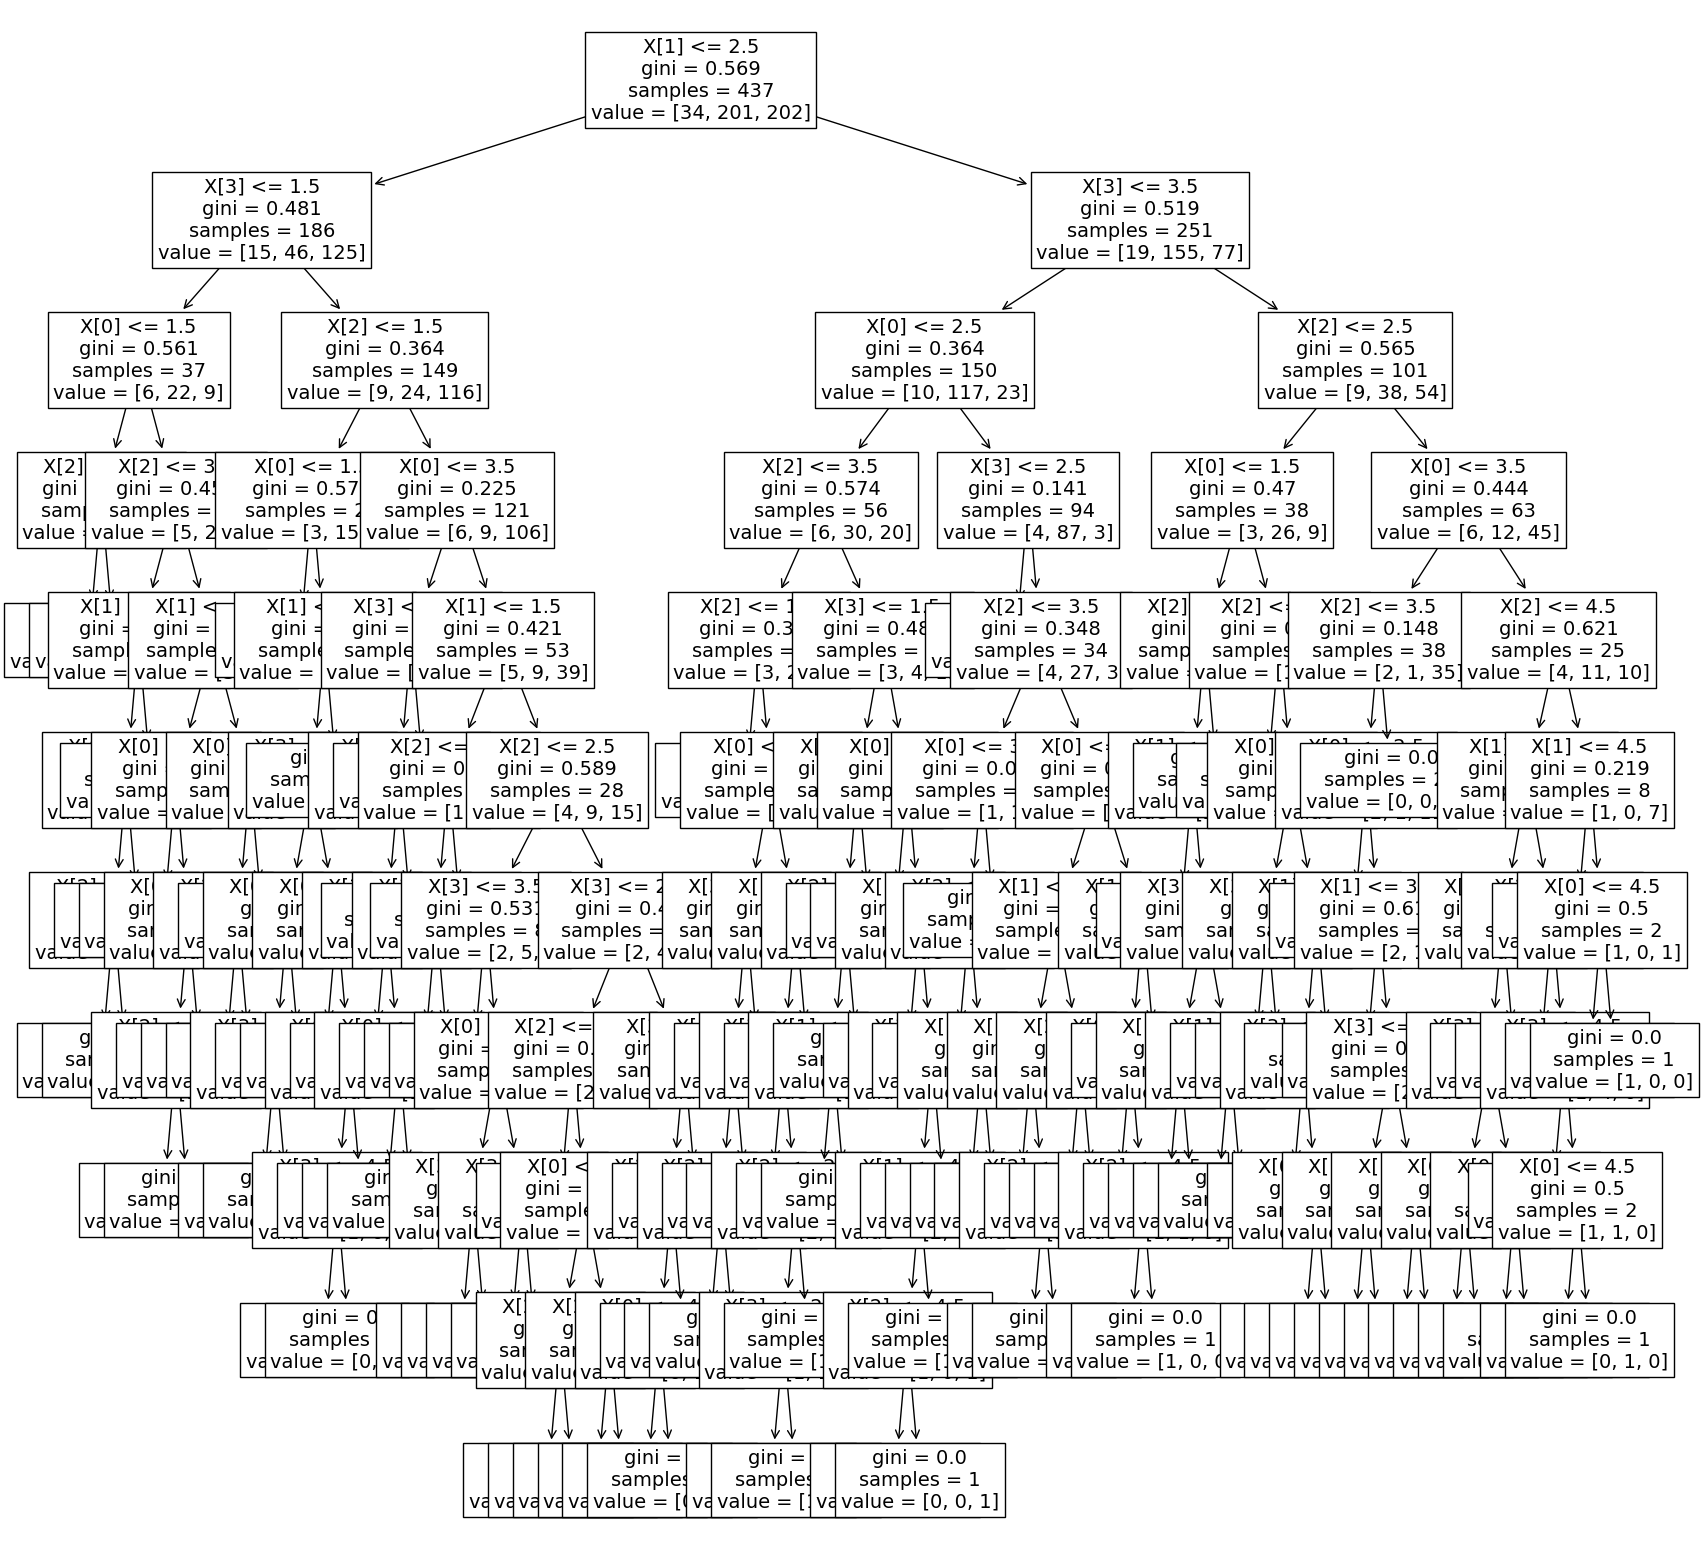

In [16]:
plt.figure(figsize=(20,20))
tree2 = plot_tree(classifier, fontsize=14)
plt.show()

8. Create an instance of a DecisionTreeClassifier using the entropy criterion.

In [17]:
classifier2 = DecisionTreeClassifier(criterion='entropy')

In [18]:
classifier2.fit(X_train, Y_train)

DecisionTreeClassifier(criterion='entropy')

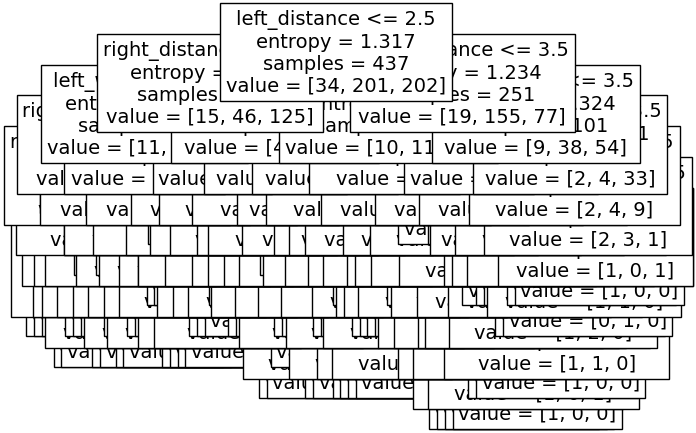

In [19]:
tree2 = plot_tree(classifier2, fontsize=14, feature_names=X.columns)
plt.show()

9. Display the tree

10. Check if the observation defined as X_new  [4, 4, 3, 3] is classified as left

In [21]:
encoder.inverse_transform(y_new)

array(['L'], dtype=object)

11. Use the gini classifier to make predictions on the test set

In [22]:
X_test = imputer.transform(X_test)

In [23]:
Y_test_pred = classifier.predict(X_test)

12. Use the entropy classifier on the test set to make predictions

In [24]:
Y_test_pred

array([1, 1, 1, 2, 2, 2, 1, 2, 2, 0, 1, 0, 1, 2, 1, 1, 2, 2, 1, 1, 2, 1,
       1, 0, 1, 0, 0, 1, 2, 1, 1, 2, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2,
       1, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 1, 1, 1,
       2, 1, 2, 2, 2, 1, 2, 1, 2, 2, 2, 2, 2, 1, 2, 2, 2, 1, 1, 1, 0, 1,
       1, 2, 1, 1, 2, 2, 2, 1, 2, 1, 2, 2, 0, 1, 2, 2, 2, 0, 1, 1, 2, 0,
       1, 1, 2, 1, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 0, 1, 2,
       2, 1, 1, 1, 2, 2, 1, 2, 2, 1, 2, 2, 0, 2, 0, 2, 1, 1, 1, 2, 2, 0,
       2, 1, 1, 2, 2, 1, 2, 2, 2, 1, 2, 1, 1, 0, 2, 1, 1, 2, 1, 1, 2, 0,
       1, 1, 2, 0, 1, 2, 1, 2, 0, 2, 1, 1])

In [25]:
Y_test_pred2 = classifier2.predict(X_test)

12. Compare each prediction made with the gini and entropy classifier, what proportion of predictions are identical?

You can either compare each prediction using a for loop over all observations' indices, otherwise you simply loop over the two prediction vectors using the ```zip``` function
You can figure out what ```zip``` does by running
```
A=[1,2,3]
B=["a","b","c"]

for a, b in zip(A,B):
  print(a,b)
```

The numbers appearing in the solution will not necessarily the ones you will obtain depending on random operations you ran on your data.

13. What's the accuracy of the gini classifier?

14. What's the accuracy of the entropy classifier? 

15. Display the model's confusion matrix, what do you notice?

16. Display the classification report for both models on both training and testing data. Do the models perform well? Do they overfit ?

*Hint : have a look at scikit-learn's documentation about available metric functions* 😉

17. How would you fight overfitting while still using decision tree classifiers? Try to find the set of hyper parameters that maximize the performances of the model on the test set. Did the model perform better ? Are there still ways to improve the model?

18. Try and create new variables in order to improve the model's performance

The conclusion to this exercise is that even though decision trees can be very high variance models able to model non-linear links between the target variable and the explanatory variables it still has very high constrains on how it can model the data.
It separates the explanatory variables space into "squares" that carry different predictions for the target variable. 